In [1]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from plot_env import plot_env
import json
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt
from mpb import MPB
%config InlineBackend.figure_format='retina'

## Corridor Radii

Running MPB with ID corridor (log file at corridor.log)...
Running MPB with ID corridor (log file at corridor.log)...
Running MPB with ID corridor (log file at corridor.log)...
Running MPB with ID corridor (log file at corridor.log)...
Running MPB with ID corridor (log file at corridor.log)...
Running MPB with ID corridor (log file at corridor.log)...


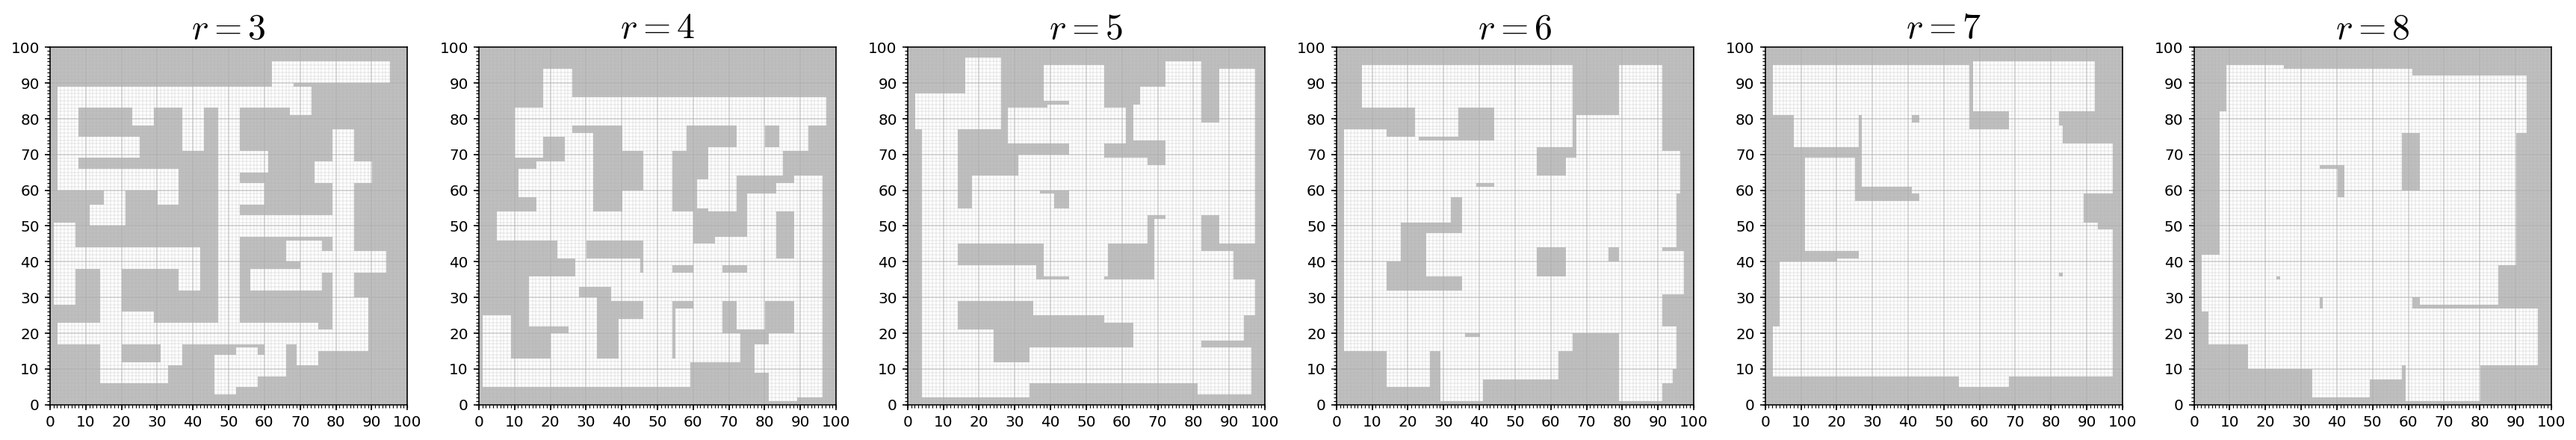

In [2]:
parameters = [3, 4, 5, 6, 7, 8]
plt.figure(figsize=(len(parameters) * 5, 5))
for i, parameter in enumerate(parameters):
    plt.subplot(1, len(parameters), i+1)
    m = MPB()
    m.set_corridor_grid_env(100, 100, branches=100, radius=parameter)
    m.set_planners(['informed_rrt_star'])
    m["max_planning_time"] = 1
    m.run(id="corridor", show_progress_bar=False, runs=1)
    run = json.load(open(m.results_filename, "r"))["runs"][0]
    plot_env(run["environment"], draw_start_goal_thetas=False, draw_start_goal=False, set_title=False)
    plt.title("$r = %g$" % parameter, fontsize=24)
plt.savefig("corridor_radii.pdf", bbox_inches='tight')
# plt.savefig("corridor_radii.png", bbox_inches='tight')

## Obstacle Ratios

Running MPB with ID corridor (log file at corridor.log)...
Running MPB with ID corridor (log file at corridor.log)...
Running MPB with ID corridor (log file at corridor.log)...
Running MPB with ID corridor (log file at corridor.log)...
Running MPB with ID corridor (log file at corridor.log)...


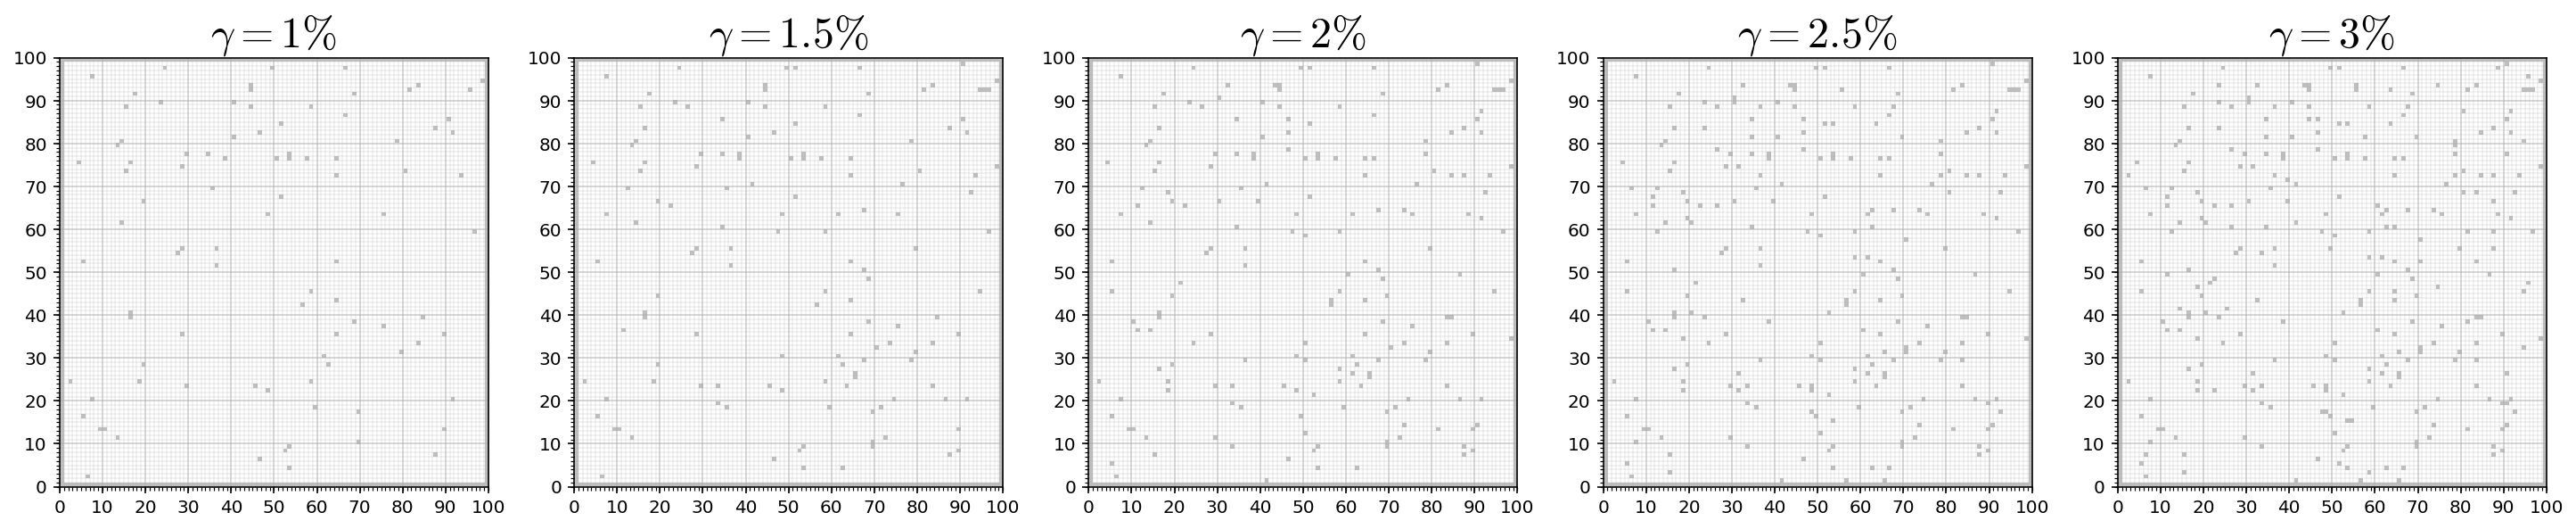

In [3]:
parameters = [0.01, 0.015, 0.02, 0.025, 0.03]
plt.figure(figsize=(len(parameters) * 5, 5))
for i, parameter in enumerate(parameters):
    plt.subplot(1, len(parameters), i+1)
    m = MPB()
    m.set_random_grid_env(100, 100, obstacle_ratio=parameter)
    m.set_planners(['informed_rrt_star'])
    m["max_planning_time"] = 1
    m.run(id="corridor", show_progress_bar=False, runs=1)
    run = json.load(open(m.results_filename, "r"))["runs"][0]
    plot_env(run["environment"], draw_start_goal_thetas=False, draw_start_goal=False, set_title=False)
    plt.title("$\gamma = %g \%%$" % (parameter * 100), fontsize=24)
plt.savefig("obstacle_ratios.pdf", bbox_inches='tight')
# plt.savefig("obstacle_ratios.png", bbox_inches='tight')